In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
X = df.drop("purchaseValue", axis=1) 
y = df['purchaseValue'] 
from sklearn.dummy import DummyRegressor 
model = DummyRegressor().fit(X,y) 
X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
y_pred=model.predict(X_test) 

In [3]:
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
submission.to_csv('submission.csv',index=False)

In [4]:
df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')

In [5]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

User & Session Metadata 
| Column          | Description                                          |
| --------------- | ---------------------------------------------------- |
| `userId`        | Unique ID for the user                               |
| `sessionId`     | Unique ID for a session (group of user interactions) |
| `sessionNumber` | The nth session for the user                         |
| `sessionStart`  | Timestamp (or similar) marking session start         |


Traffic Source
| Column                                         | Description                                               |
| ---------------------------------------------- | --------------------------------------------------------- |
| `trafficSource`                                | Source of the traffic (e.g., google, direct, referral)    |
| `trafficSource.isTrueDirect`                   | Whether the visit was truly direct (i.e., typed URL)      |
| `trafficSource.medium`                         | Medium (e.g., organic, cpc, referral)                     |
| `trafficSource.campaign`                       | Marketing campaign that led to the session                |
| `trafficSource.adContent`                      | Content of the ad (e.g., banner or ad copy text)          |
| `trafficSource.keyword`                        | Keyword used in search ads                                |
| `trafficSource.referralPath`                   | Full path of referring URL                                |
| `trafficSource.adwordsClickInfo.slot`          | Position of the ad (top, side)                            |
| `trafficSource.adwordsClickInfo.page`          | Page number of the ad click                               |
| `trafficSource.adwordsClickInfo.adNetworkType` | Type of ad network (e.g., Search, Content)                |
| `trafficSource.adwordsClickInfo.isVideoAd`     | Whether it was a video ad                                 |
| `gclIdPresent`                                 | Whether a Google Click ID (GCLID) is present (binary 0/1) |



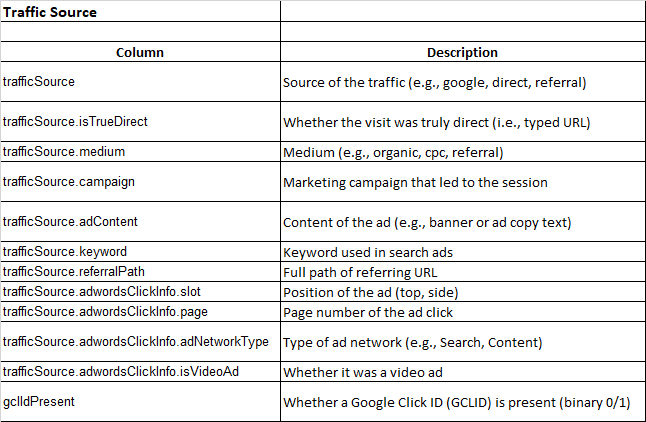
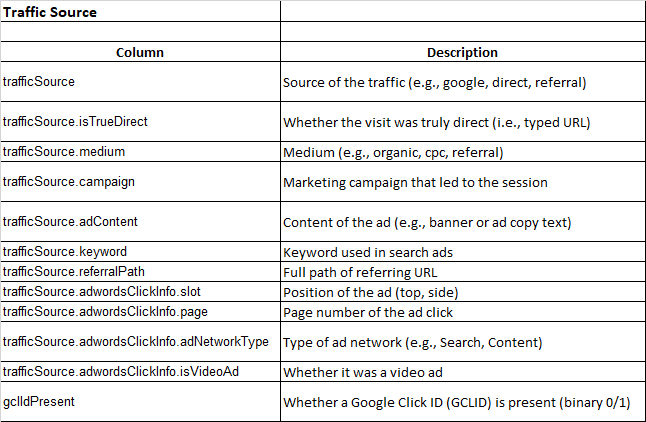
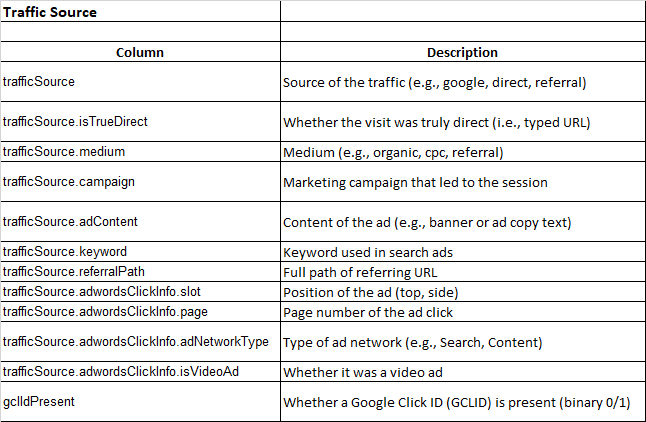
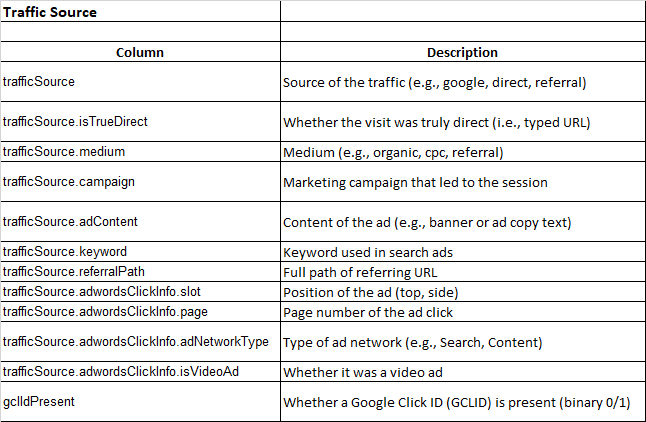

trafficSource.keyword

| Keyword                   | Meaning                                                                             |
| ------------------------- | ----------------------------------------------------------------------------------- |
| `"buy running shoes"`     | User searched for running shoes to purchase                                         |
| `"best budget laptops"`   | Likely someone in research mode                                                     |
| `"company name"`          | Branded search — user was looking for you                                           |
| `"discount travel deals"` | User wants deals, may be price sensitive                                            |
| `"(not set)"`             | Ad shown without keyword-level tracking (possibly due to auto-targeting or privacy) |
| `None` or `NaN`           | No keyword info (user didn't come via paid search)                                  |



trafficSource.adContent
| Example Value               | Description                                      |
| --------------------------- | ------------------------------------------------ |
| `"Free Trial Banner"`       | Ad highlighting a free trial                     |
| `"Summer Sale 20% Off"`     | Text related to a seasonal discount              |
| `"CTA-Red-Button"`          | Version of ad using a red call-to-action button  |
| `"Google Display Ad 1"`     | A specific ad from Google Display Network        |
| `"Homepage Promo A"`        | Version A of a homepage promotional ad           |
| `"Dynamic Ad Copy - Shoes"` | Dynamic ad personalized to a shoe-related search |
| `"Retargeting Banner 2"`    | Retargeting ad for visitors who didn’t convert   |

trafficSource.medium

| Medium      | Meaning                                                               |
| ----------- | --------------------------------------------------------------------- |
| `organic`   | Free search engine traffic (e.g., Google search results not from ads) |
| `cpc`       | Paid traffic via cost-per-click ads (e.g., Google Ads)                |
| `referral`  | A user clicked a link on another site (not search engines or ads)     |
| `none`      | Direct traffic (user typed URL or used bookmark)                      |
| `email`     | Came from an email campaign                                           |
| `affiliate` | Came through an affiliate marketing partner                           |
| `social`    | Came via a social media platform (e.g., Facebook, Twitter)            |

trafficSource.adwordsClickInfo.slot'
| Slot Value      | Meaning                                                                                        |
| --------------- | ---------------------------------------------------------------------------------------------- |
| `"Top"`         | The ad was shown at the **top of the search results page** (above organic results)             |
| `"Right"`       | The ad was shown on the **right-hand side** of the page (common before Google's layout update) |
| `"Bottom"`      | The ad was displayed **below** the organic results                                             |
| `NaN` or `None` | No slot info — user didn’t come via an AdWords ad or data not recorded                         |


Example Values in trafficSource.campaign:

| Campaign Name            | What It Likely Means                                                |
| ------------------------ | ------------------------------------------------------------------- |
| `spring_sale`            | A campaign promoting a spring discount                              |
| `brand-awareness-2024`   | A branding-focused ad effort                                        |
| `black_friday_deals`     | Seasonal promotion for Black Friday                                 |
| `retargeting_campaign_1` | A retargeting campaign targeting returning visitors                 |
| `(not set)`              | No campaign was set — user likely came via direct or organic search |
| `affiliates`             | Traffic from affiliate marketers                                    |
| `google/cpc`             | Default for paid search from Google Ads                             |


The 'trafficSource' column in your dataset likely refers to the overall source of the user's visit.
* trafficSource.medium : 7 unique values
* trafficSource.campaign : 28 unique values
* trafficSource.keyword : 566 unique values
* trafficSource.adContent : 53 unique values
  
trafficSource.referralPath':
* trafficSource.referralPath'
* trafficSource': example.com'
* trafficSource.referralPath': /articles/how-to-buy


trafficSource.adwordsClickInfo.page
| Value | Meaning                                                     |
| ----- | ----------------------------------------------------------- |
| `1.0` | The ad was clicked on the **first page** of search results. |
| `2.0` | Click came from the **second page** of results.             |
| `5.0` | The user clicked the ad on **page 5** of results.           |


The field trafficSource.adwordsClickInfo.adNetworkType is typically found in web analytics or advertising data, especially in datasets coming from Google Analytics or Google Ads integration.

What it represents:
* Possible values of adNetworkType include:
* Search Network: The click came from a Google Search ad.
* Display Network: The click came from a Google Display Network ad.
* Search partners: The click came from one of Google's search partners.
* YouTube Search or YouTube Videos (sometimes): If the ad was shown on YouTube.

Use case:
This field is useful for analyzing which ad networks perform best in driving traffic and conversions, so you can optimize your ad spend and campaign targeting.

Device & Browser Info
| Column                             | Description                                       |
| ---------------------------------- | ------------------------------------------------- |
| `browser`                          | Full browser name (e.g., Chrome, Safari)          |
| `browserMajor`                     | Major browser version (e.g., Chrome 115)          |
| `device.browserVersion`            | Specific version of the browser                   |
| `deviceType`                       | Type of device (mobile, desktop, tablet)          |
| `device.language`                  | Language setting of the browser/device            |
| `device.operatingSystemVersion`    | OS version (e.g., iOS 14)                         |
| `device.flashVersion`              | Flash plugin version (outdated but still tracked) |
| `device.screenResolution`          | Screen resolution (e.g., 1920x1080)               |
| `device.browserSize`               | Browser window size (not necessarily screen size) |
| `device.screenColors`              | Color depth of the screen                         |
| `device.isMobile`                  | Whether the device is mobile (True/False)         |
| `device.mobileDeviceBranding`      | Brand of the mobile device (e.g., Samsung)        |
| `device.mobileDeviceMarketingName` | Marketing name (e.g., Galaxy S21)                 |
| `device.mobileDeviceModel`         | Device model (e.g., SM-G991U)                     |
| `device.mobileInputSelector`       | Method of user input (touch, mouse, etc.)         |



Geolocation
| Column                       | Description                                             |
| ---------------------------- | ------------------------------------------------------- |
| `geoNetwork.city`            | City of the user                                        |
| `geoNetwork.metro`           | Metro area (e.g., Bay Area)                             |
| `geoNetwork.region`          | State/province/region                                   |
| `geoNetwork.subContinent`    | Subcontinent (e.g., Northern Europe)                    |
| `geoNetwork.continent`       | Continent (e.g., Asia)                                  |
| `geoNetwork.networkLocation` | ISP or network name                                     |
| `geoNetwork.networkDomain`   | Domain of network provider                              |
| `geoCluster`                 | Custom geographic clustering or segmentation            |
| `locationCountry`            | Country name                                            |
| `locationZone`               | Custom zone/country group, may be internal segmentation |


| Column                       | Unique Values |
| ---------------------------- | ------------- |
| `geoCluster`                 | 5             |
| `geoNetwork.networkDomain`   | 3             |
| `geoNetwork.region`          | 388           |
| `geoNetwork.networkLocation` | 1             |
| `geoNetwork.subContinent`    | 23            |
| `geoNetwork.city`            | 695           |
| `geoNetwork.metro`           | 104           |
| `geoNetwork.continent`       | 6             |
| `Location Country    `       | 193           |

 

This dataset captures detailed session-level information from a large-scale digital commerce platform. Each row corresponds to a unique user session and includes data on user behavior, acquisition channels, device information, and geographical location.

Participants are expected to predict the purchaseValue, which represents the total amount spent during a given session.

Key Feature Categories
User Behavior & Session Metrics

totalHits, pageViews, totals.bounces, new_visits, totals.visits: Indicators of user engagement and session activity.
sessionNumber, sessionStart: Information related to session sequence and timing.
Device & Technical Attributes

deviceType, os, browser, screenSize, device.browserSize, device.language: Details about the user's device and browsing environment.
browserMajor, device.*: Encompasses a variety of device-level descriptors such as model, version, and screen specifications.
gclIdPresent: Signals the presence of a Google Click ID used in ad tracking.
Traffic & Marketing Source

userChannel, trafficSource, trafficSource.medium, trafficSource.keyword, trafficSource.campaign: Insights into how users arrived at the platform.
trafficSource.adwordsClickInfo.*: Contains attributes from advertising sources, including ad network type and slot.
trafficSource.adContent, trafficSource.referralPath, trafficSource.isTrueDirect: Provide further attribution details.
Geographical Context

geoNetwork.city, locationCountry, geoNetwork.continent, geoNetwork.subContinent, geoNetwork.metro, geoNetwork.region: Geographic identifiers to help understand regional behavior trends.
geoCluster, locationZone: Groupings based on geographic or behavioral patterns.
Identifiers

userId, sessionId: Unique identifiers for each user and session, allowing for multi-session analysis.
Target Variable

purchaseValue: The amount (in currency units) spent by the customer during the session. This is the target variable to be predicted.


In [7]:
df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


| **Column**                              | **Meaning**                                                                       | **Insight from Summary**                                                                           |
| --------------------------------------- | --------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **purchaseValue**                       | The total monetary value (revenue) from the user’s session(s)                     | Mostly **zero** (mean ≈ 26M but median is 0), very **skewed** with some large outliers (max ≈ 23B) |
| **userId**                              | Anonymized unique identifier for each user                                        | Range: 0 to \~122K, probably uniquely identifies each user                                         |
| **gclIdPresent**                        | Flag (0/1) indicating if a Google Click ID (from an ad) was present               | Mostly **0**, few ad-click users (mean ≈ 0.037)                                                    |
| **sessionNumber**                       | The number of the session (e.g., 1st, 2nd, etc.) in the user's lifetime           | Many users have only **1 session**, but some have **hundreds** (max = 447)                         |
| **totals.visits**                       | Usually reflects visits per user/session (in your case, always **1.0**)           | Constant = 1, not useful                                                                           |
| **sessionId**                           | Unique identifier for each session                                                | Large range (looks like timestamps), might not need direct use in modeling                         |
| **trafficSource.adwordsClickInfo.page** | Page number where ad was clicked (from AdWords)                                   | Only 4281 non-null rows; usually **1**, rarely goes up to **5**                                    |
| **pageViews**                           | Number of pages viewed in the session                                             | Mean = 8.4, but some sessions have **469 pageviews** = potential bots or extreme engagement        |
| **locationZone**                        | Some custom or derived regional zone grouping (e.g., time zones, business zones?) | Only value = **8** — likely not informative                                                        |
| **totals.bounces**                      | Did the user leave the site without interaction (0 = no, 1 = yes)                 | Only 47k non-null values, all are 1.0 = all bounced, so might be incorrectly populated             |
| **date**                                | Date of session (e.g., 20170806)                                                  | Ranges from \~201608xx to \~201804xx — good for time-based analysis                                |
| **totalHits**                           | Total hits (pageviews + events) during session                                    | Mean = 10.6, max = 500 — another measure of engagement                                             |
| **sessionStart**                        | Unix timestamp or derived session start ID                                        | Same range as `sessionId`; likely redundant                                                        |
| **new\_visits**                         | 1 if it’s the user’s **first session**, NaN otherwise                             | 80k non-null = 80k new users, value is always 1 if present                                         |


 **Interpretation Summary**
purchaseValue is heavily skewed: most users don't buy, but some spend a lot. Consider a log transformation or regression on non-zero purchases only.

sessionNumber, pageViews, and totalHits might be good indicators of user engagement and could correlate with conversion.

gclIdPresent and AdWords-related columns are sparse but might indicate paid traffic users.

totals.visits, locationZone, and possibly totals.bounces seem uninformative or constant — may be dropped or verified.

Time-based fields (date, sessionStart) could help analyze trends, seasonality, or create temporal features like "day of week" or "hour of session".



In [8]:
print("\nNumber of unique values for categorical features:")
categorical_cols = df.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"  Column '{col}': {df[col].nunique()} unique values")


Number of unique values for categorical features:
  Column 'trafficSource.isTrueDirect': 1 unique values
  Column 'browser': 34 unique values
  Column 'device.screenResolution': 1 unique values
  Column 'trafficSource.adContent': 53 unique values
  Column 'trafficSource.keyword': 566 unique values
  Column 'screenSize': 1 unique values
  Column 'geoCluster': 5 unique values
  Column 'trafficSource.adwordsClickInfo.slot': 3 unique values
  Column 'device.mobileDeviceBranding': 1 unique values
  Column 'device.mobileInputSelector': 1 unique values
  Column 'trafficSource.campaign': 28 unique values
  Column 'device.mobileDeviceMarketingName': 1 unique values
  Column 'geoNetwork.networkDomain': 3 unique values
  Column 'device.operatingSystemVersion': 1 unique values
  Column 'device.flashVersion': 1 unique values
  Column 'geoNetwork.region': 388 unique values
  Column 'trafficSource': 161 unique values
  Column 'geoNetwork.networkLocation': 1 unique values
  Column 'os': 18 unique val

Potentially Useful Features (Diverse, Varying):
These columns have enough variation to potentially contribute predictive power:
| Column                       | Unique Values | Notes                                                  |
| ---------------------------- | ------------- | ------------------------------------------------------ |
| `browser`                    | 34            | Browser type – useful for tech segmentation            |
| `trafficSource.adContent`    | 53            | Ad variation – may relate to targeting strategy        |
| `trafficSource.keyword`      | 566           | High-cardinality – may need encoding or grouping       |
| `trafficSource.campaign`     | 28            | Shows campaign diversity                               |
| `geoNetwork.region`          | 388           | Very granular – might need grouping                    |
| `trafficSource`              | 161           | Broad source labels (some might be rare)               |
| `os`                         | 18            | Operating systems – potentially useful                 |
| `geoNetwork.subContinent`    | 23            | Useful for regional targeting                          |
| `trafficSource.medium`       | 7             | Common traffic channel (e.g., organic, cpc)            |
| `locationCountry`            | 193           | Can be grouped by region if needed                     |
| `geoNetwork.city`            | 695           | High-cardinality – needs reduction or encoding         |
| `geoNetwork.metro`           | 104           | Can be grouped or encoded                              |
| `trafficSource.referralPath` | 941           | High-cardinality – probably needs cleaning or grouping |
| `userChannel`                | 8             | Could relate to customer segmentation                  |
| `geoNetwork.continent`       | 6             | Broad but useful geographic segment                    |


Low Variance or Constant Features:
These columns have only 1 unique value, so they don’t provide any useful information for modeling:
| Column                                     |
| ------------------------------------------ |
| `trafficSource.isTrueDirect`               |
| `device.screenResolution`                  |
| `screenSize`                               |
| `device.mobileDeviceBranding`              |
| `device.mobileInputSelector`               |
| `device.mobileDeviceMarketingName`         |
| `geoNetwork.networkLocation`               |
| `device.operatingSystemVersion`            |
| `device.flashVersion`                      |
| `trafficSource.adwordsClickInfo.isVideoAd` |
| `browserMajor`                             |
| `device.browserSize`                       |
| `socialEngagementType`                     |
| `device.mobileDeviceModel`                 |
| `device.language`                          |
| `device.browserVersion`                    |
| `device.screenColors`                      |


 Low to Moderate Cardinality (Might Still Be Useful):
| Column                                         | Unique Values | Notes                                  |
| ---------------------------------------------- | ------------- | -------------------------------------- |
| `trafficSource.adwordsClickInfo.slot`          | 3             | Might relate to ad position            |
| `geoNetwork.networkDomain`                     | 3             | Could still hold meaning               |
| `trafficSource.adwordsClickInfo.adNetworkType` | 2             | Binary feature from AdWords            |
| `deviceType`                                   | 3             | Important for device behavior analysis |


In [9]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
abs_vals = numeric_df.abs()
large_vals = (abs_vals > 1e6)
#print("Large values (abs > 1e6):")
#print(numeric_df[large_vals.any(axis=1)])
large_vals_count = large_vals.sum()
print("Count of large non-zero values (abs > 1e-6) per column:\n")
print(large_vals_count)


Count of large non-zero values (abs > 1e-6) per column:

purchaseValue                           23964
userId                                      0
gclIdPresent                                0
sessionNumber                               0
totals.visits                               0
sessionId                              116023
trafficSource.adwordsClickInfo.page         0
pageViews                                   0
locationZone                                0
totals.bounces                              0
date                                   116023
totalHits                                   0
sessionStart                           116023
new_visits                                  0
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [10]:
small_vals = (abs_vals < 1e-6) & (abs_vals > 0)
#print("Small non-zero values (abs < 1e-6):")
#print(numeric_df[small_vals.any(axis=1)])
print("Has inf:\n", np.isinf(numeric_df).any())
print("Has NaN:\n", numeric_df.isna().any())


Has inf:
 purchaseValue                          False
userId                                 False
gclIdPresent                           False
sessionNumber                          False
totals.visits                          False
sessionId                              False
trafficSource.adwordsClickInfo.page    False
pageViews                              False
locationZone                           False
totals.bounces                         False
date                                   False
totalHits                              False
sessionStart                           False
new_visits                             False
dtype: bool
Has NaN:
 purchaseValue                          False
userId                                 False
gclIdPresent                           False
sessionNumber                          False
totals.visits                          False
sessionId                              False
trafficSource.adwordsClickInfo.page     True
pageViews              

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [11]:
small_vals_count = small_vals.sum()
print("Count of small non-zero values (abs < 1e-6) per column:\n")
print(small_vals_count)

Count of small non-zero values (abs < 1e-6) per column:

purchaseValue                          0
userId                                 0
gclIdPresent                           0
sessionNumber                          0
totals.visits                          0
sessionId                              0
trafficSource.adwordsClickInfo.page    0
pageViews                              0
locationZone                           0
totals.bounces                         0
date                                   0
totalHits                              0
sessionStart                           0
new_visits                             0
dtype: int64


In [12]:
df.shape
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
116018,NaN,35180000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,28,not available in demo dataset,1500318402,Americas,False,1.0
116019,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_5,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1478624150,Americas,False,1.0
116020,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_1,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,1,not available in demo dataset,1470384216,Asia,False,NaN
116021,NaN,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_5,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,2,not available in demo dataset,1506953297,Americas,False,1.0
116022,True,81470000.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_5,NaN,not available in demo dataset,...,not available in demo dataset,mobile,Organic Search,not available in demo dataset,102,not available in demo dataset,1501474532,Americas,True,NaN


In [13]:
import numpy as np

print("NaN count:\n", df.isna().sum())
print("Inf count:\n", np.isinf(df.select_dtypes(include=[float, int])).sum())

NaN count:
 trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        

In [14]:
print("\nPotential Missing Values:")
print(df.isnull().sum())


Potential Missing Values:
trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                         

In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"  Column '{col}': Found {len(outliers)} potential outliers.")

  Column 'purchaseValue': Found 23985 potential outliers.
  Column 'gclIdPresent': Found 4295 potential outliers.
  Column 'sessionNumber': Found 14116 potential outliers.
  Column 'trafficSource.adwordsClickInfo.page': Found 65 potential outliers.
  Column 'pageViews': Found 12419 potential outliers.
  Column 'totalHits': Found 13154 potential outliers.


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: Ru

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

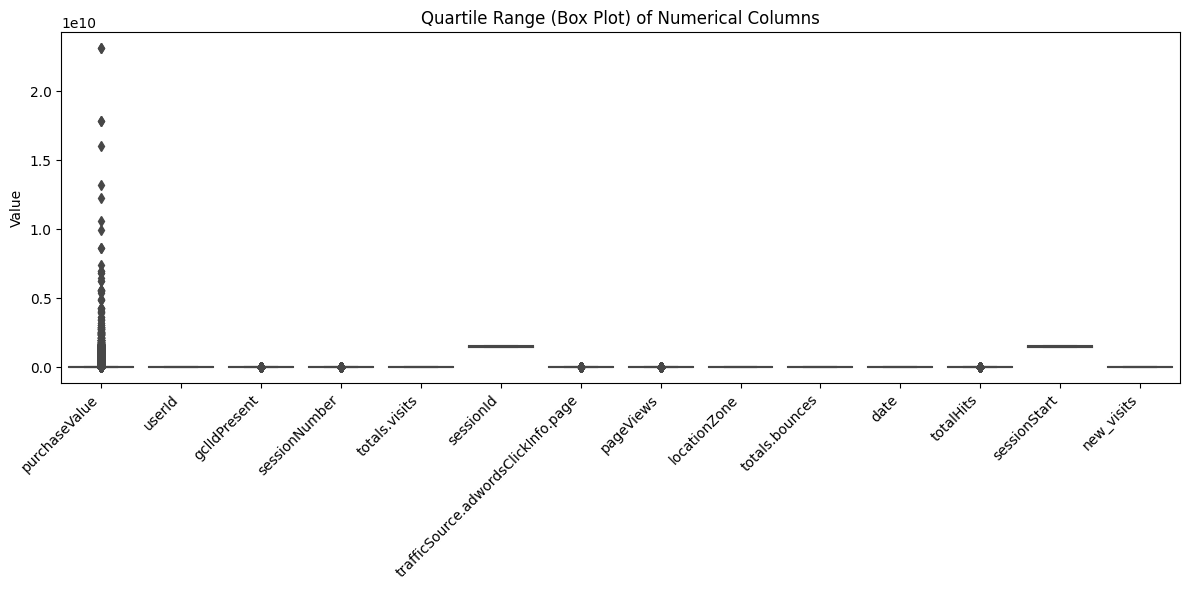

In [17]:
numerical_cols = df.select_dtypes(include=['number']).columns
if not numerical_cols.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numerical_cols])
    plt.title('Quartile Range (Box Plot) of Numerical Columns')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("\nCannot draw quartile range as data is not loaded or is empty.")